In [96]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from imblearn.over_sampling import  SMOTE
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df=pd.read_csv("./creditcard.csv")
dff=df.copy()
dff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dff.shape

(284807, 31)

In [4]:
dff.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dff.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dff['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Time', ylabel='Density'>

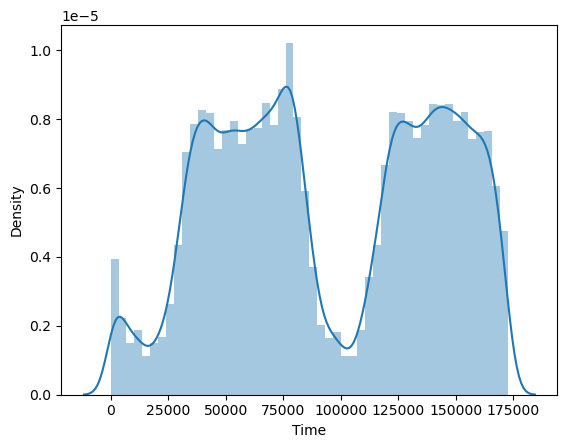

In [10]:
sns.distplot(dff['Time'])

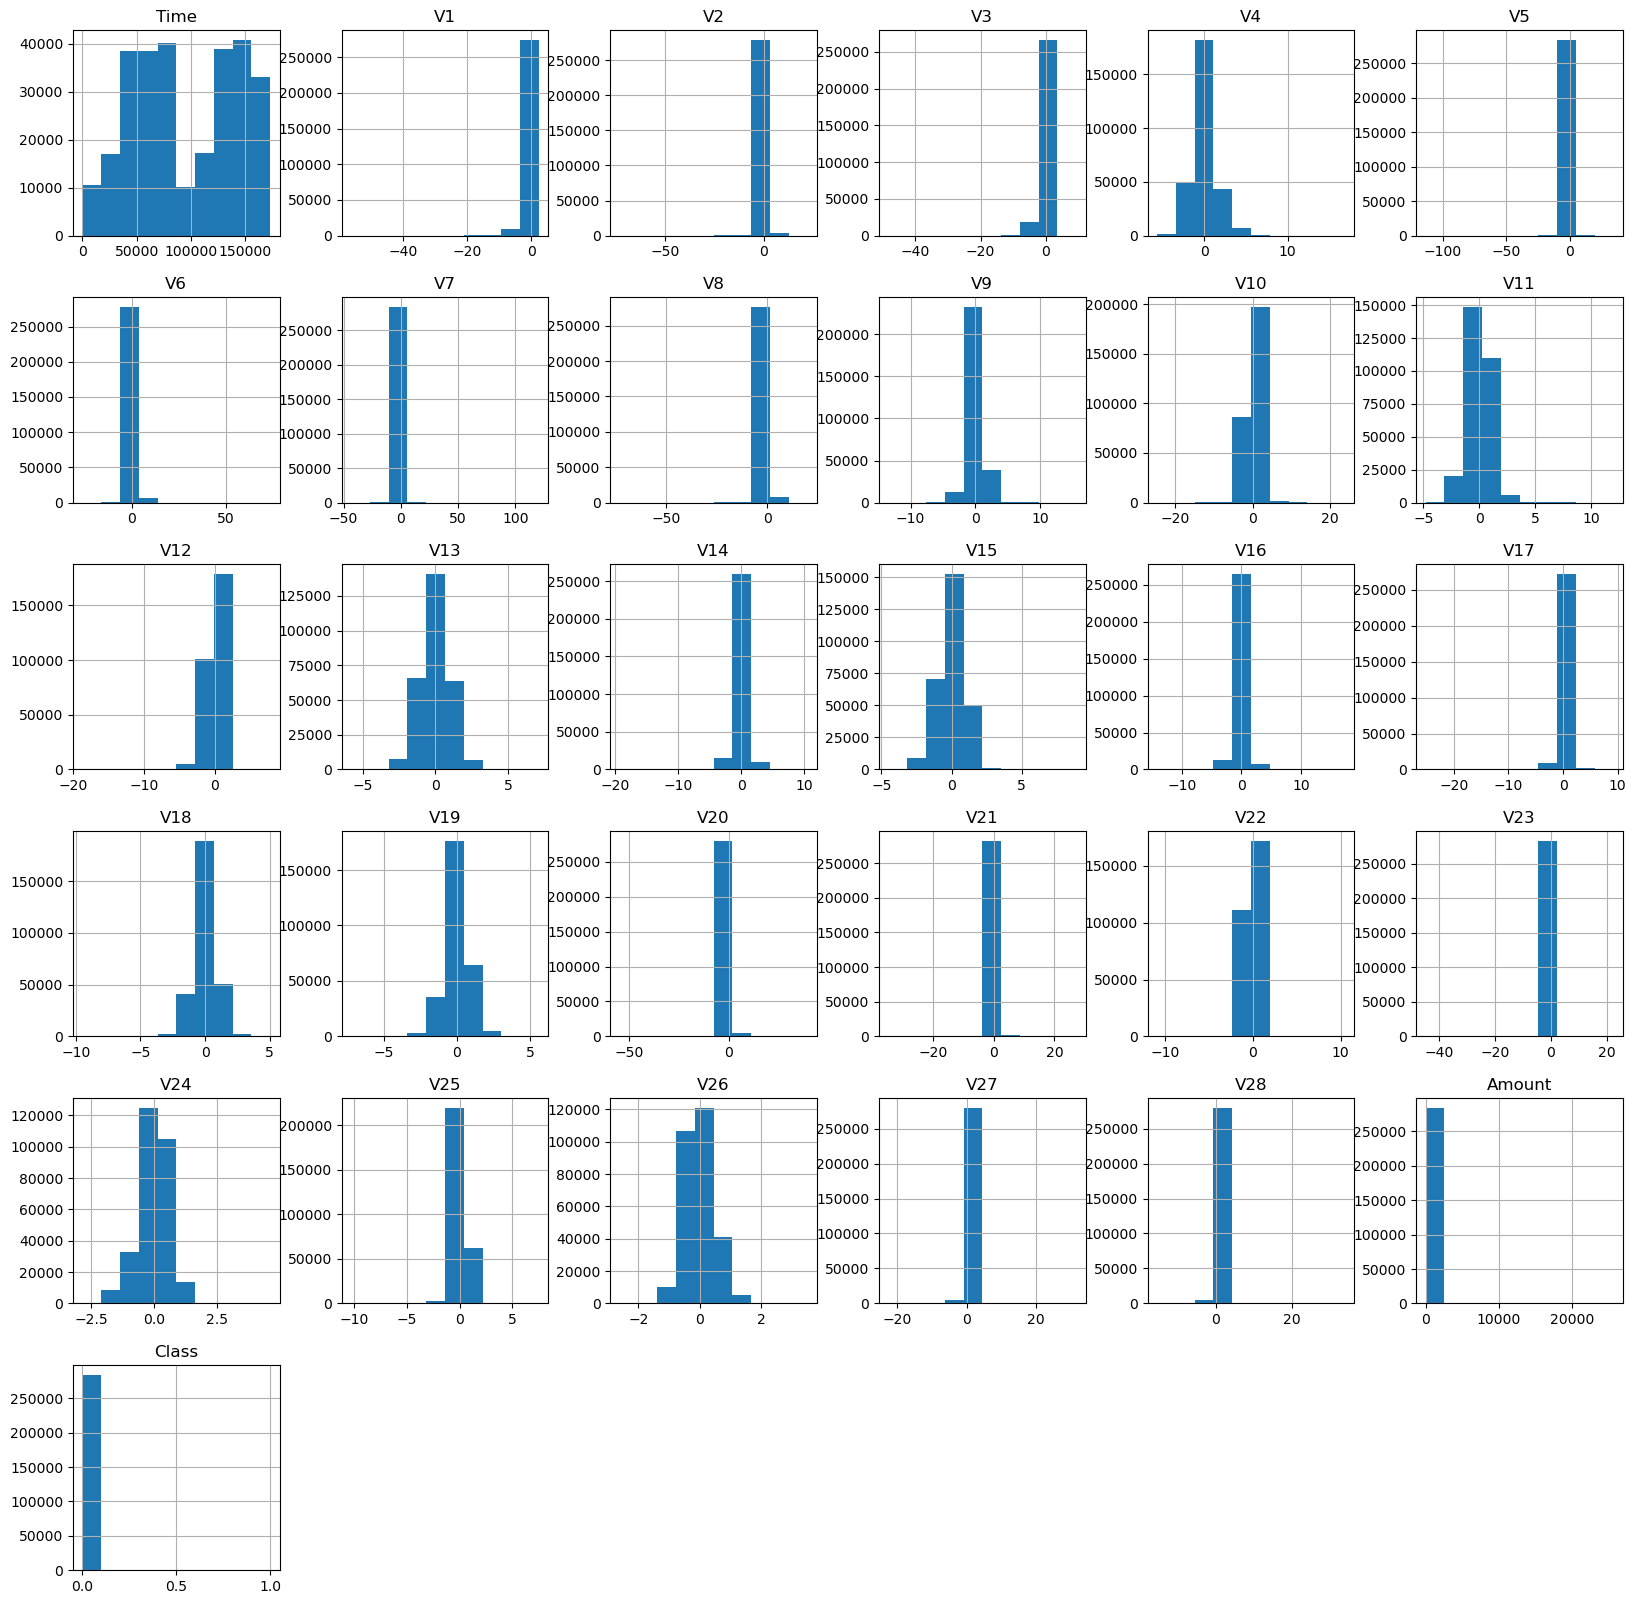

In [17]:
dff.hist(figsize=(20,20))
plt.show()

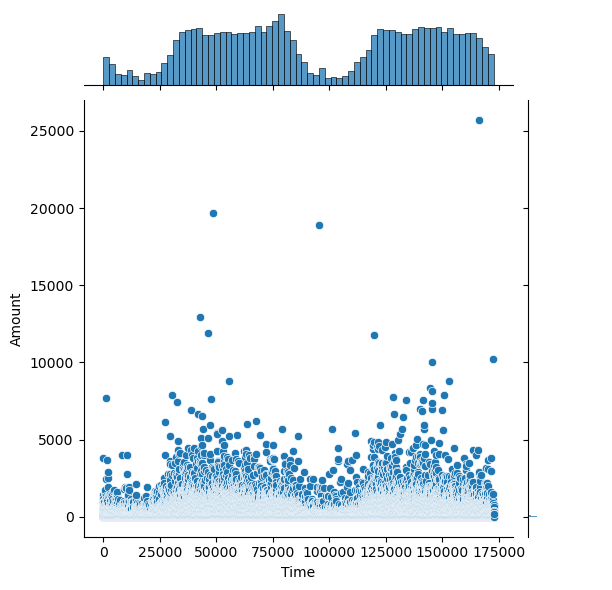

In [18]:
sns.jointplot( data = dff, x= 'Time', y= 'Amount')

In [19]:
d=dff
class0 = d[d['Class']==0]
len(class0)

284315

In [20]:
dff[dff['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
class1 = d[d['Class']==1]
len(class1)


492

In [23]:
temp=shuffle(class0)

In [24]:
temp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2075,1601.0,-1.930637,1.718791,0.391904,-0.862776,-0.686371,-0.550843,-0.205290,1.003237,0.162460,...,-0.115471,-0.516414,0.009792,-0.021957,-0.127610,0.287543,-0.031820,0.161152,1.00,0
239968,150365.0,2.032507,-1.842119,-1.355508,-1.482566,-1.203668,-0.651599,-0.777929,-0.313130,-1.205577,...,-0.115074,-0.167722,0.000185,-0.663336,-0.136395,-0.137456,-0.022959,-0.029835,178.70,0
271352,164535.0,-2.031032,0.179904,-2.001528,-0.525156,-1.406639,0.596706,0.564284,1.037491,0.189110,...,-0.259587,-0.414045,0.755897,-1.061350,-2.260147,-0.163069,0.240617,-0.219779,276.24,0
203131,134666.0,-1.220220,-1.729458,-1.118957,-0.266099,0.823338,-0.098556,-0.407751,0.563010,-1.007790,...,0.237283,0.487028,0.286055,-0.119733,-0.909162,-0.117020,0.173995,-0.023852,155.00,0
153848,100373.0,1.939803,-0.126750,-1.261662,0.191484,0.913593,0.973455,-0.236474,0.173491,1.547907,...,-0.344819,-0.522130,0.341169,-1.682751,-0.469719,0.270247,-0.050021,-0.092913,1.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172878,121280.0,-0.743111,-0.529384,-1.490321,-2.789538,1.372611,-0.958967,1.917348,-0.599842,-1.379008,...,0.500852,1.604797,-0.094871,0.239953,0.362448,-0.056081,0.092083,-0.000375,164.15,0
98449,66667.0,-0.640846,1.220186,1.294350,2.804523,-0.451414,1.715581,-0.170878,0.669450,-0.846958,...,0.000567,0.185987,0.054407,-0.798919,-0.902975,0.026293,-0.054476,0.102516,83.15,0
15308,26685.0,1.208380,0.053880,0.116786,1.392972,0.581971,1.496787,-0.329675,0.325421,-0.285694,...,-0.156571,-0.261276,-0.232213,-1.631564,0.532336,1.098615,-0.047973,-0.020517,16.54,0
183775,125946.0,1.894845,0.400503,-0.623102,3.760542,0.418072,0.362404,0.003171,0.073337,-0.824998,...,0.101455,0.434630,0.036094,-0.348242,0.135874,0.098847,-0.032164,-0.065127,3.94,0


In [25]:
d1 = temp.iloc[:2000,:]
d1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2075,1601.0,-1.930637,1.718791,0.391904,-0.862776,-0.686371,-0.550843,-0.205290,1.003237,0.162460,...,-0.115471,-0.516414,0.009792,-0.021957,-0.127610,0.287543,-0.031820,0.161152,1.00,0
239968,150365.0,2.032507,-1.842119,-1.355508,-1.482566,-1.203668,-0.651599,-0.777929,-0.313130,-1.205577,...,-0.115074,-0.167722,0.000185,-0.663336,-0.136395,-0.137456,-0.022959,-0.029835,178.70,0
271352,164535.0,-2.031032,0.179904,-2.001528,-0.525156,-1.406639,0.596706,0.564284,1.037491,0.189110,...,-0.259587,-0.414045,0.755897,-1.061350,-2.260147,-0.163069,0.240617,-0.219779,276.24,0
203131,134666.0,-1.220220,-1.729458,-1.118957,-0.266099,0.823338,-0.098556,-0.407751,0.563010,-1.007790,...,0.237283,0.487028,0.286055,-0.119733,-0.909162,-0.117020,0.173995,-0.023852,155.00,0
153848,100373.0,1.939803,-0.126750,-1.261662,0.191484,0.913593,0.973455,-0.236474,0.173491,1.547907,...,-0.344819,-0.522130,0.341169,-1.682751,-0.469719,0.270247,-0.050021,-0.092913,1.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,33730.0,-1.131791,1.373137,1.130836,0.401083,-0.918165,-0.762620,-0.156888,0.739290,-0.363612,...,0.119520,0.275712,-0.106481,0.782649,0.133074,0.366819,-0.345341,-0.071828,1.00,0
208702,137235.0,1.997088,0.158299,-1.763942,0.574275,0.165649,-1.530674,0.339336,-0.420850,0.542014,...,0.212098,0.733736,-0.051106,-0.017336,0.250061,-0.108121,-0.005105,-0.022855,33.98,0
74884,55797.0,0.963815,0.012326,0.189501,0.961636,0.136339,0.341500,0.103298,0.137881,-0.385254,...,0.189457,0.478868,-0.127004,-0.254061,0.501624,-0.296900,0.032300,0.018268,82.35,0
250619,154998.0,2.033430,-0.158180,-2.959869,-0.575505,2.605897,3.143905,-0.412225,0.783482,0.359489,...,-0.350207,-0.998789,0.360391,0.605007,-0.265848,0.219296,-0.039873,-0.042176,5.49,0


In [26]:
frames = [d1, class1]
df_temp = pd.concat(frames)


In [27]:
df_temp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2075,1601.0,-1.930637,1.718791,0.391904,-0.862776,-0.686371,-0.550843,-0.205290,1.003237,0.162460,...,-0.115471,-0.516414,0.009792,-0.021957,-0.127610,0.287543,-0.031820,0.161152,1.00,0
239968,150365.0,2.032507,-1.842119,-1.355508,-1.482566,-1.203668,-0.651599,-0.777929,-0.313130,-1.205577,...,-0.115074,-0.167722,0.000185,-0.663336,-0.136395,-0.137456,-0.022959,-0.029835,178.70,0
271352,164535.0,-2.031032,0.179904,-2.001528,-0.525156,-1.406639,0.596706,0.564284,1.037491,0.189110,...,-0.259587,-0.414045,0.755897,-1.061350,-2.260147,-0.163069,0.240617,-0.219779,276.24,0
203131,134666.0,-1.220220,-1.729458,-1.118957,-0.266099,0.823338,-0.098556,-0.407751,0.563010,-1.007790,...,0.237283,0.487028,0.286055,-0.119733,-0.909162,-0.117020,0.173995,-0.023852,155.00,0
153848,100373.0,1.939803,-0.126750,-1.261662,0.191484,0.913593,0.973455,-0.236474,0.173491,1.547907,...,-0.344819,-0.522130,0.341169,-1.682751,-0.469719,0.270247,-0.050021,-0.092913,1.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [28]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 2075 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float64


In [29]:
df1= shuffle(df_temp)

In [30]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146555,87758.0,2.038539,0.214344,-1.698421,0.541628,0.177565,-1.518255,0.315055,-0.422576,0.527739,...,0.206627,0.771444,-0.032617,-0.005768,0.262369,-0.106393,-0.001485,-0.028490,12.99,0
210439,137984.0,-0.731712,1.553777,-0.313163,-0.884821,0.623573,-0.389546,0.498642,-1.798166,0.274729,...,1.219149,-1.177719,0.224740,-0.674289,-0.291917,0.182624,0.289662,0.165278,4.99,0
124087,77171.0,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,-0.038339,...,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1.00,1
87466,61696.0,-0.044551,1.443767,0.182212,0.871528,0.447213,-1.124332,1.102979,-0.342355,-0.562676,...,0.120426,0.711144,0.010900,0.438497,-0.608522,-0.415726,0.556464,0.293353,1.90,0
5125,4814.0,-0.318580,1.118957,1.083980,1.196101,0.781020,-0.829120,1.028112,-0.399197,0.313846,...,-0.066564,0.168951,-0.105768,0.393830,-0.300395,-0.462996,-0.030527,-0.046898,32.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240800,150756.0,1.767131,-2.025433,-0.855422,-1.237585,-1.604423,-0.861203,-0.592400,-0.402153,-1.419594,...,-0.466079,-1.385101,0.300436,0.008985,-0.672268,-0.699592,-0.018119,0.010603,279.00,0
153947,100810.0,-0.103193,1.377419,0.806954,3.355156,1.759830,1.368868,0.836032,-0.127481,0.068641,...,-0.079038,0.252394,-0.322324,-0.448685,-0.299063,0.154390,-0.151245,-0.036532,3.78,0
262382,160447.0,2.065851,-1.202194,-0.053902,-0.539678,-1.436480,-0.041975,-1.454675,0.092584,0.410349,...,-0.154626,0.024619,0.228551,-0.729096,-0.649600,0.643446,0.010163,-0.031429,45.90,0
284217,172254.0,-0.041076,0.644398,-1.423684,-0.818431,1.631888,-1.097125,1.717632,-0.328262,-0.839913,...,0.285728,0.728820,0.048232,0.747356,-0.296459,0.388546,0.006287,0.123944,85.25,0


<Axes: xlabel='Class', ylabel='count'>

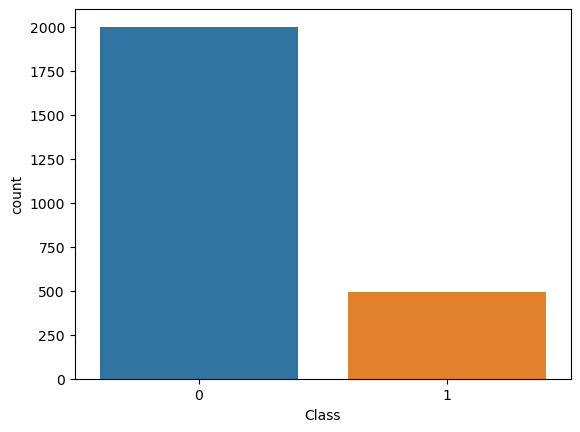

In [32]:
sns.countplot(x='Class', data=df1)

In [35]:
oversample=SMOTE()
X=df1.iloc[ : ,:-1]
Y=df1.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

In [36]:
X=pd.DataFrame(X)
X.shape

(4000, 30)

In [37]:
Y=pd.DataFrame(Y)
Y.head()

,Class
0,0
1,0
2,1
3,0
4,0


In [38]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

data=pd.concat([X,Y],axis=1)

d=data.values

data=pd.DataFrame(d,columns=names)


<Axes: xlabel='Class', ylabel='count'>

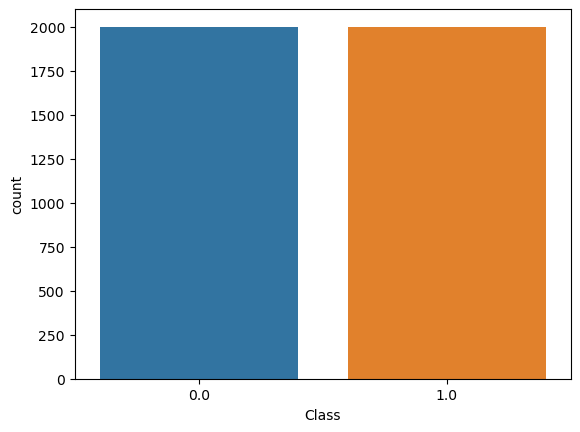

In [39]:
sns.countplot(x='Class', data=data)

In [40]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,88390.140260,-2.421022,1.889987,-3.622448,2.336514,-1.593420,-0.729847,-2.883376,0.312901,-1.337813,...,0.377922,-0.004220,-0.020358,-0.057911,0.021795,0.027397,0.085539,0.045587,96.242757,0.500000
std,48445.611264,5.496114,3.617283,6.184961,3.143182,4.200412,1.709141,5.710274,4.892432,2.205238,...,2.752440,1.145048,1.099943,0.548887,0.638709,0.454319,0.947691,0.408340,203.480142,0.500063
min,68.000000,-30.552380,-19.143284,-31.103685,-4.525453,-22.105532,-8.608727,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.366761,-7.263482,-3.707261,0.000000,0.000000
25%,45478.819669,-3.030341,-0.124920,-5.268270,-0.043361,-1.730906,-1.568340,-3.230832,-0.186345,-2.413161,...,-0.157929,-0.514401,-0.226247,-0.398628,-0.309078,-0.274331,-0.061559,-0.054019,2.690000,0.000000
50%,81846.500000,-0.822052,0.992233,-1.473662,1.424263,-0.432981,-0.686216,-0.732853,0.162341,-0.765879,...,0.160681,0.022124,-0.030045,-0.004829,0.041375,0.003128,0.054127,0.038481,23.609225,0.500000
75%,135044.065186,0.952969,2.889334,0.296681,4.388218,0.454757,0.063885,0.199176,0.858635,0.103338,...,0.661764,0.540248,0.190753,0.336721,0.365964,0.305765,0.439622,0.221567,99.990000,1.000000
max,172580.000000,2.418802,22.057729,3.580663,12.114672,17.370895,6.570065,8.212451,20.007208,7.932015,...,27.202839,8.361985,5.936241,3.148027,2.208209,2.745261,3.052358,5.301158,3561.840000,1.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

<Axes: >

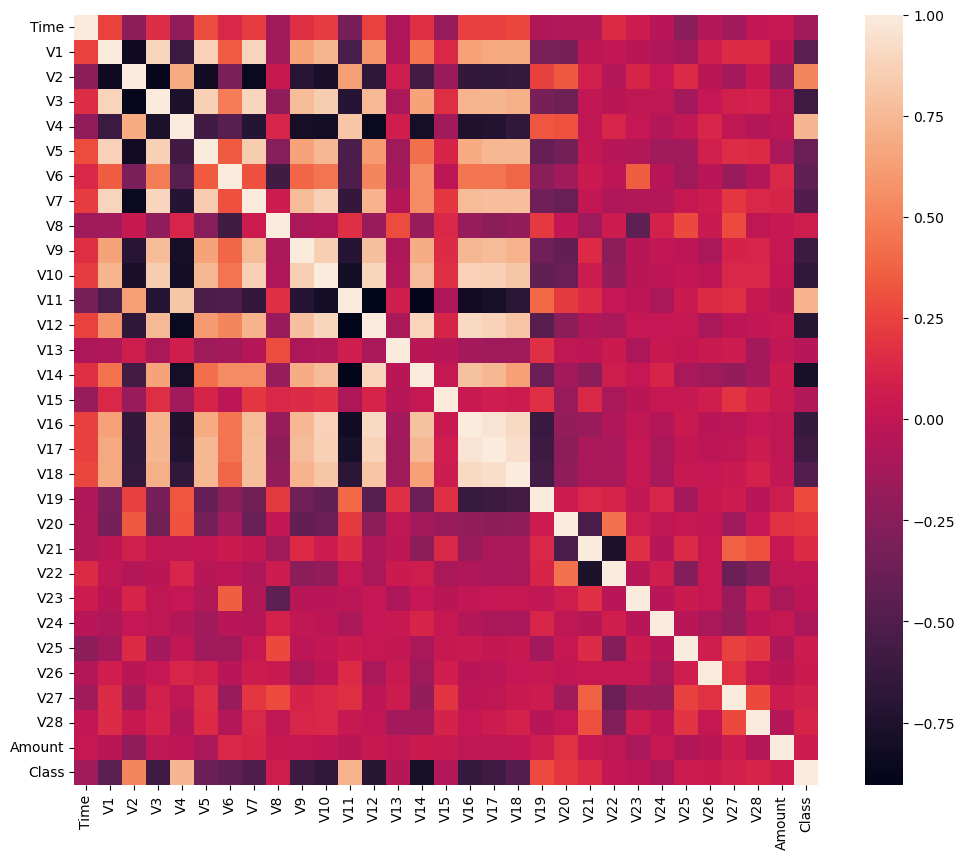

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [46]:
scaler = StandardScaler()
frames= ['Time', 'Amount']
x= data[frames]
d_temp = data.drop(frames, axis=1)
temp_col=scaler.fit_transform(x)
scaled_col = pd.DataFrame(temp_col, columns=frames)
scaled_col.head()

,Time,Amount
0,-0.013050,-0.409196
1,1.023830,-0.448516
2,-0.231611,-0.468128
3,-0.551081,-0.463704
4,-1.725370,-0.314039


In [47]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.013050,-0.409196,2.038539,0.214344,-1.698421,0.541628,0.177565,-1.518255,0.315055,-0.422576,...,-0.161285,0.206627,0.771444,-0.032617,-0.005768,0.262369,-0.106393,-0.001485,-0.028490,0.0
1,1.023830,-0.448516,-0.731712,1.553777,-0.313163,-0.884821,0.623573,-0.389546,0.498642,-1.798166,...,-0.177467,1.219149,-1.177719,0.224740,-0.674289,-0.291917,0.182624,0.289662,0.165278,0.0
2,-0.231611,-0.468128,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1.0
3,-0.551081,-0.463704,-0.044551,1.443767,0.182212,0.871528,0.447213,-1.124332,1.102979,-0.342355,...,0.267787,0.120426,0.711144,0.010900,0.438497,-0.608522,-0.415726,0.556464,0.293353,0.0
4,-1.725370,-0.314039,-0.318580,1.118957,1.083980,1.196101,0.781020,-0.829120,1.028112,-0.399197,...,0.164739,-0.066564,0.168951,-0.105768,0.393830,-0.300395,-0.462996,-0.030527,-0.046898,0.0


In [48]:
y = data['Class']
d_scaled.head()


,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.013050,-0.409196,2.038539,0.214344,-1.698421,0.541628,0.177565,-1.518255,0.315055,-0.422576,...,-0.161285,0.206627,0.771444,-0.032617,-0.005768,0.262369,-0.106393,-0.001485,-0.028490,0.0
1,1.023830,-0.448516,-0.731712,1.553777,-0.313163,-0.884821,0.623573,-0.389546,0.498642,-1.798166,...,-0.177467,1.219149,-1.177719,0.224740,-0.674289,-0.291917,0.182624,0.289662,0.165278,0.0
2,-0.231611,-0.468128,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,...,-0.023576,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1.0
3,-0.551081,-0.463704,-0.044551,1.443767,0.182212,0.871528,0.447213,-1.124332,1.102979,-0.342355,...,0.267787,0.120426,0.711144,0.010900,0.438497,-0.608522,-0.415726,0.556464,0.293353,0.0
4,-1.725370,-0.314039,-0.318580,1.118957,1.083980,1.196101,0.781020,-0.829120,1.028112,-0.399197,...,0.164739,-0.066564,0.168951,-0.105768,0.393830,-0.300395,-0.462996,-0.030527,-0.046898,0.0


In [49]:
pca = PCA(n_components=7)
X_temp_reduced = pca.fit_transform(d_scaled)
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)

In [50]:
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-9.506208,0.634854,-0.726935,0.776247,0.405344,-1.359686,-0.347104
1,-9.445337,2.653945,-0.165469,-1.084456,-1.834292,-0.494685,-0.788679
2,-8.726573,-0.137361,0.364334,5.910233,0.697796,-0.840162,-0.256458
3,-9.561312,1.045285,-1.200519,-0.808769,-0.097269,-0.412837,-0.808313
4,-9.404730,0.484248,-0.239168,0.563573,0.627824,-0.016022,-1.003433


In [51]:
Y=d_scaled['Class']
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [52]:
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,-9.506208,0.634854,-0.726935,0.776247,0.405344,-1.359686,-0.347104,0.0
1,-9.445337,2.653945,-0.165469,-1.084456,-1.834292,-0.494685,-0.788679,0.0
2,-8.726573,-0.137361,0.364334,5.910233,0.697796,-0.840162,-0.256458,1.0
3,-9.561312,1.045285,-1.200519,-0.808769,-0.097269,-0.412837,-0.808313,0.0
4,-9.404730,0.484248,-0.239168,0.563573,0.627824,-0.016022,-1.003433,0.0


In [53]:
new_data.shape

(4000, 8)

In [54]:
X=new_data.drop("Class", axis=1)
Y=new_data['Class']

In [55]:
x_train,x_test,y_train, y_test= train_test_split(X,Y, test_size=0.25, random_state=1)

In [56]:
x_train.shape

(3000, 7)

In [57]:
x_test.shape

(1000, 7)

In [61]:
lr=LogisticRegression()
lr_params={'penalty':['l1','l2'], 'C':[0.001,0.01, 0.1,1,10,100,1000]}
grid_lr=GridSearchCV(lr, param_grid=lr_params)
grid_lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [62]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [63]:
lr_pred=grid_lr.predict(x_test)

In [64]:
accuracy_score(y_test, lr_pred)

0.965

In [95]:
grid_lr.best_score_

0.9703333333333333

In [88]:
svc=SVC()
svc_params=[{'C':[1,10,100,1000], 'kernel':['rbf'],'gamma':[0.1,1,0.01,0.0001,0.001]}]
grid_svc=GridSearchCV(svc,param_grid=svc_params,scoring='accuracy',n_jobs=-1)
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 1, 0.01, 0.0001, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [89]:
grid_svc.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [90]:
svc_pred=grid_svc.predict(x_test)

In [91]:
accuracy_score(svc_pred, y_test)

0.965

In [94]:
grid_svc.best_score_

0.9720000000000001

In [74]:
dt=DecisionTreeClassifier()
dt_params={'criterion':['gini','entropy'], 'max_depth':list(range(2,4,1)),
           'min_samples_leaf': list(range(5,7,1))}
grid_dt=GridSearchCV(dt, param_grid=dt_params)
grid_dt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]})

In [75]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6}

In [92]:
dt_pred=grid_dt.predict(x_test)
(accuracy_score(dt_pred,y_test))*100

95.5

In [93]:
grid_dt.best_score_

0.9586666666666666

In [78]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       542
         1.0       0.94      0.99      0.96       458

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



In [80]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       540
         1.0       0.94      0.99      0.96       460

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



In [82]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       546
         1.0       0.92      0.98      0.95       454

    accuracy                           0.95      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.96      0.95      0.96      1000



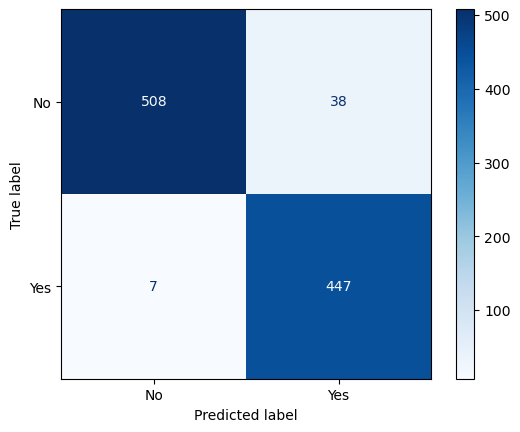

In [87]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dt_pred, y_test), display_labels=['No','Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [97]:
lr_fpr, lr_tpr,lr_threshold=roc_curve(y_test, lr_pred)
svc_fpr, svc_tpr,svc_threshold=roc_curve(y_test, svc_pred)
dt_fpr, dt_tpr,dt_threshold=roc_curve(y_test, dt_pred)

In [98]:
lr_fpr

array([0.        , 0.00776699, 1.        ])

In [99]:
lr_tpr

array([0.        , 0.93608247, 1.        ])

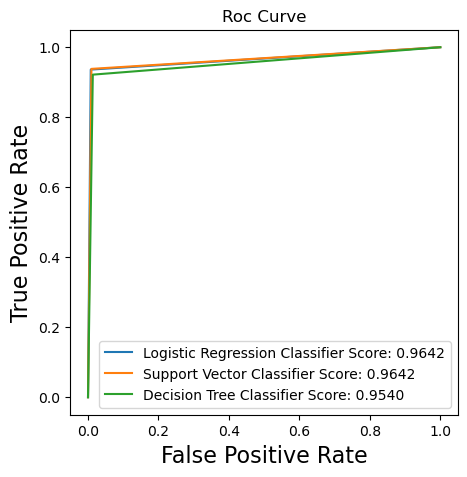

In [103]:

plt.figure(figsize=(5,5))
plt.title("Roc Curve")
plt.plot(lr_fpr,lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dt_pred)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()


In [104]:
import pickle
pickle.dump(grid_svc, open('model.pkl','wb'))

In [105]:
model=pickle.load(open('model.pkl','rb'))

In [106]:
result=model.predict([[-9.506208,0.634854,-0.726935,0.776247,0.405344,-1.359686,-0.347104]])

In [107]:
result

array([0.])

In [108]:
"Not Fraud" if result[0]==0 else "Fraud"

'Not Fraud'

In [109]:
result=model.predict([[-8.726573,-0.137361,0.364334,5.910233,0.697796,-0.840162,-0.256458]])

In [110]:
result

array([1.])

In [113]:
"Not Fraud" if result[0]==0 else "Fraud" if result[0]==1 else None

'Fraud'